# Women's E-Commerce Clothing Reviews

# Introduction

Nowadays, every companies use e-commerce to develop their business, especially by using online selling, websites and social media. Understanding customers’ needs is the first priority for any company and business. This way they can find what is their target group and goals, how they can improve their products or services and build their strategy plans around these information. One of the ways for studying costumer behavior in e-commerce is using the reviews and rating they gave to the each product that they purchased online. In this assignment, I am going to analyze the customer reviews on women clothing e-commerce. And I attempt to find the products’ ID which have no recommendation (Recommended IND=0) , and report them so the companies improve these product or stop producing them and come up with new products. And also I try to find a relationship between Rating and Age and Age and Recommendation, and come up with a formula to predict Rating based on Age . Because I believe it is harder to satisfied older women than younger one.

# Questions:
* The Distribution of age of people
* The distribution of rating
* Proportion of recommended to not recommended
* Crosstab plot for Age and Rating, Is the age of people have impact on their rating?
* The average rating for each Clothing ID
* Finding Clothing ID with low rating mean and report their ID to strategy group so they can make decision about it.

# The Dataset:
The Women’s Clothing E-Commerce Reviews was used as the dataset for this study.(1) This dataset consists of reviews and rating by real customers, hence it has been anonymized. customer names were not included, and references to the company were replaced with “retailer” by the Kaggle website.(3) I download my CSV file which contain my data from The Kaggle website too.

**Loading Data set**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#import dataset from jupyter notebook.
data= pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

**Describe Data Set**

In [9]:
print(data.head(1))


   Unnamed: 0  Clothing ID  Age Title  \
0           0          767   33   NaN   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   

   Positive Feedback Count Division Name Department Name Class Name  
0                        0     Initmates        Intimate  Intimates  


In [10]:
print(data.tail(1))

       Unnamed: 0  Clothing ID  Age                            Title  \
23485       23485         1104   52  Please make more like this one!   

                                             Review Text  Rating  \
23485  This dress in a lovely platinum is feminine an...       5   

       Recommended IND  Positive Feedback Count   Division Name  \
23485                1                       22  General Petite   

      Department Name Class Name  
23485         Dresses    Dresses  


In [11]:

print(data.columns)

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')


In [12]:

print(data.shape)

(23486, 11)


In [13]:

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [14]:
print(data.describe())

         Unnamed: 0   Clothing ID           Age        Rating  \
count  23486.000000  23486.000000  23486.000000  23486.000000   
mean   11742.500000    918.118709     43.198544      4.196032   
std     6779.968547    203.298980     12.279544      1.110031   
min        0.000000      0.000000     18.000000      1.000000   
25%     5871.250000    861.000000     34.000000      4.000000   
50%    11742.500000    936.000000     41.000000      5.000000   
75%    17613.750000   1078.000000     52.000000      5.000000   
max    23485.000000   1205.000000     99.000000      5.000000   

       Recommended IND  Positive Feedback Count  
count     23486.000000             23486.000000  
mean          0.822362                 2.535936  
std           0.382216                 5.702202  
min           0.000000                 0.000000  
25%           1.000000                 0.000000  
50%           1.000000                 1.000000  
75%           1.000000                 3.000000  
max           

**Finding missing data**

In [15]:
#total number of NaN 
print(data.isnull().sum())


Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [16]:
# deleting null or missing data values
data.dropna()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [17]:
df= data.rename(index=str,columns={"Recommended IND":"Recom", "Clothing ID":"ID", "Review Text":"Review"})

**Based on the questions I just need columns : ID,Age,Review,Rating,Recommended. So I am going to seperate them from dataframe by .loc**

In [18]:

Df= df.loc[:,["ID","Review","Recom","Age","Rating"]]
print (Df.head())

     ID                                             Review  Recom  Age  Rating
0   767  Absolutely wonderful - silky and sexy and comf...      1   33       4
1  1080  Love this dress!  it's sooo pretty.  i happene...      1   34       5
2  1077  I had such high hopes for this dress and reall...      0   60       3
3  1049  I love, love, love this jumpsuit. it's fun, fl...      1   50       5
4   847  This shirt is very flattering to all due to th...      1   47       5


**Now the data is understood, aheading towards solving the questions**


# Q1:The Distribution of age of people

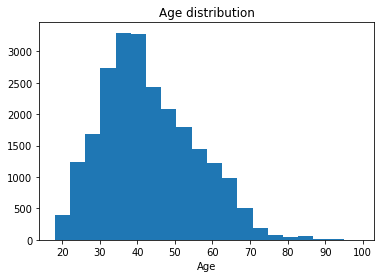

In [20]:
#Histogram for Age
plt.hist(Df['Age'],bins=20)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

**Result: As you can see the mode of the age is between 30-40**

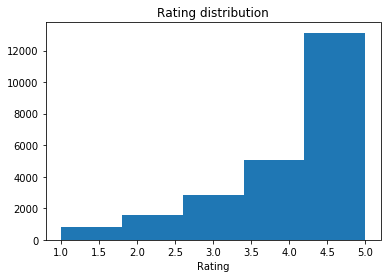

In [21]:
#Histogram for Rating
plt.hist(Df['Rating'],bins=5)
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.show()

**Result: As you can see most of the rates is five**

# Q2:The distribution of rating


In [22]:
#pie chart for recommended
z= Df.groupby('Recom').count()
print(z)

          ID  Review    Age  Rating
Recom                              
0       4172    4101   4172    4172
1      19314   18540  19314   19314


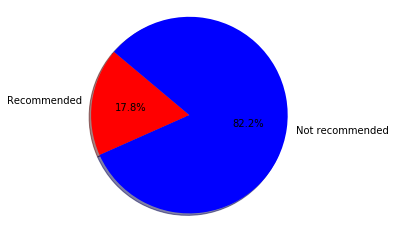

In [23]:
label= 'Recommended', 'Not recommended'
size= [4172,19314]
color=['Red','Blue']
 
# Plot
plt.pie(size, labels=label, colors=color,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In here we can see most of the people do not recommend the clothes that they bought

**Conclusion**: Because be mode of rating is 5, we can say people do not pay attention to the recommended question unless they are not satisfied with their purchase

In [24]:
Q4=Df.loc[:,['Age','Rating']]
conditions = [
    (Df['Age'] < 20),
    (Df['Age'] >=20) & (Df['Age'] <30),
    (Df['Age'] >=30) & (Df['Age'] <40),
    (Df['Age'] >=40) & (Df['Age'] <50),
    (Df['Age'] >=50) & (Df['Age'] <60),
    (Df['Age'] >=60) & (Df['Age'] <70),
    (Df['Age'] >=70)
    ]
choices = [20,25,35,45,55,65,70]
Q4['AGE_mean'] = np.select(conditions, choices, default='A')
print(Q4)

       Age  Rating AGE_mean
0       33       4       35
1       34       5       35
2       60       3       65
3       50       5       55
4       47       5       45
...    ...     ...      ...
23481   34       5       35
23482   48       3       45
23483   31       3       35
23484   28       3       25
23485   52       5       55

[23486 rows x 3 columns]


# Q3:Proportion of recommended to not recommended

Text(0, 0.5, 'Frequency of Rating')

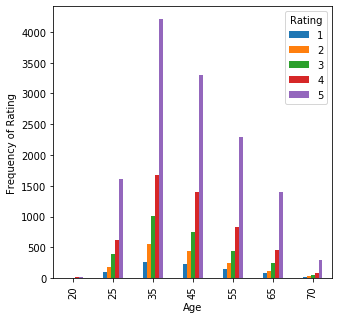

In [25]:
pd.crosstab(Q4.AGE_mean,Q4.Rating).plot(kind="bar",figsize=(5,5))
plt.xlabel('Age')
plt.ylabel('Frequency of Rating')

Based on the figure above: In every group of age, most of the people give 5 to their purcheses.

# Q4:Crosstab plot for Age and Rating, Is the age of people have impact on their rating?

In [27]:
Q4_1=Q4.loc[Q4['Rating'] == 5]
Q4_2=Q4_1.groupby(['AGE_mean']).count()

In [28]:
Q4_3= Q4.groupby(['AGE_mean']).count()

In [29]:
100* Q4_2['Age']/Q4_3['Age']

AGE_mean
20    45.454545
25    55.871147
35    54.622176
45    53.925249
55    57.928065
65    60.997831
70    62.156448
Name: Age, dtype: float64

As result, we can see as customers’ age goes up the percentage of the people who give the 5 to the clothes is goes up. So, it is easier to please the older woman than younger one.

# Q5 : The average rating for each Clothing ID?

In [30]:
#the average rating for each clothing ID
Q5= pd.DataFrame(Df.groupby('ID')['Rating'].mean().rename('mean'))
print(Q5)

          mean
ID            
0     5.000000
1     4.000000
2     4.000000
3     5.000000
4     5.000000
...        ...
1201  4.000000
1202  4.333333
1203  4.545455
1204  4.500000
1205  5.000000

[1206 rows x 1 columns]


# Q6: Finding Clothing ID with low rating mean and report their ID to strategy group so they can make decision about it.

In [31]:
Q5[Q5['mean']<2.5].index

Int64Index([  11,   18,   80,   91,   96,   99,  104,  106,  118,  185,  192,
             210,  219,  220,  229,  235,  236,  246,  259,  269,  273,  284,
             285,  305,  348,  368,  369,  371,  421,  432,  521,  559,  567,
             569,  572,  588,  635,  653,  669,  743,  758,  759,  785,  812,
             814,  913,  946,  973,  982, 1127, 1152, 1158, 1176, 1195],
           dtype='int64', name='ID')

**Conclusion**: The clothes whose IDs are mentioned in above cell need some things or they can eliminate them from their selling items.